# Clonamos el repositorio para obtener los dataSet

In [ ]:
!git clone https://github.com/joanby/tensorflow.git

# Damos acceso a nuestro Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Test it

In [ ]:
!ls '/content/drive/My Drive' 

# Google colab tools

In [1]:
from google.colab import files # Para manejar los archivos y, por ejemplo, exportar a su navegador
import glob # Para manejar los archivos y, por ejemplo, exportar a su navegador
from google.colab import drive # Montar tu Google drive

##Especificando la versión de TensorFlow

Ejecutando "importar tensorflow" importará la versión por defecto (actualmente 2.x). Puedes usar la 1.x ejecutando una celda con la "versión mágica de tensorflow" **antes de ejecutar "importar tensorflow".

### Si no funciona hacer el pip install


In [2]:
#!pip install tensorflow==1.14
%tensorflow_version 1.x

TensorFlow 1.x selected.


# Importar Tensorflow

In [3]:
import tensorflow as tf
print(tf.__version__)
import matplotlib.pyplot as plt

1.15.2


In [4]:
session = tf.Session()

# Elastic Net

In [65]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets

In [70]:
iris = datasets.load_iris()

In [71]:
x_vals = np.array([[x[1], x[2], x[3]] for x in iris.data])
y_vals = np.array([x[0] for x in iris.data])

- $x\in\mathbb R^3$
- $A \in \mathbb R_{3\times 1}$
- $y = Ax+b\in \mathbb R$

In [72]:
batch_size = 50
learning_rate = 0.001
x_data = tf.placeholder(shape=[None, 3], dtype = tf.float32)
y_target = tf.placeholder(shape = [None, 1], dtype = tf.float32)
A = tf.Variable(tf.random_normal(shape = [3,1]))
b = tf.Variable(tf.random_normal(shape = [1,1]))
y_pred = tf.add(tf.matmul(x_data, A), b)

$$Loss = \sum\frac{(y_r-y_p)^2}{n} + \alpha \cdot |A| + \beta \cdot A^2$$

In [73]:
elastic_param1 = tf.constant(1.0)
elastic_param2 = tf.constant(1.0)
l1_a_loss = tf.reduce_mean(tf.abs(A))
l2_a_loss = tf.reduce_mean(tf.square(A))
e1_term = tf.multiply(elastic_param1, l1_a_loss)
e2_term = tf.multiply(elastic_param2, l2_a_loss)
loss = tf.expand_dims(tf.add(tf.add(tf.reduce_mean(tf.square(y_target- y_pred)),e1_term), e2_term), 0)

In [74]:
init = tf.global_variables_initializer()
session.run(init)

In [57]:
init = tf.global_variables_initializer()
session.run(init)

In [75]:
my_opt = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
train_step = my_opt.minimize(loss)

In [76]:
loss_vec = []
for i in range(1000):
    rand_idx = np.random.choice(len(x_vals), size=batch_size)
    rand_x = x_vals[rand_idx]
    rand_y = np.transpose([y_vals[rand_idx]])
    session.run(train_step, feed_dict={x_data : rand_x, y_target: rand_y})
    temp_loss = session.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})
    loss_vec.append(temp_loss[0])
    if(i+1)%100==0:
        print("Paso #"+str(i+1)+"A = "+str(session.run(A))+", b = "+str(session.run(b))+
             "Loss: "+str(temp_loss))

Paso #100A = [[ 0.59217376]
 [ 1.1427814 ]
 [-1.153307  ]], b = [[0.9547456]]Loss: [2.1923075]
Paso #200A = [[ 0.63630587]
 [ 1.0622405 ]
 [-1.0437446 ]], b = [[0.9890005]]Loss: [1.9612145]
Paso #300A = [[ 0.670142  ]
 [ 0.99894047]
 [-0.93642527]], b = [[1.0218096]]Loss: [1.8057163]
Paso #400A = [[ 0.68993944]
 [ 0.93879247]
 [-0.8366211 ]], b = [[1.0514381]]Loss: [1.7085485]
Paso #500A = [[ 0.7061365]
 [ 0.890093 ]
 [-0.7404171]], b = [[1.0809444]]Loss: [1.5399883]
Paso #600A = [[ 0.7159894]
 [ 0.846138 ]
 [-0.6504693]], b = [[1.1092469]]Loss: [1.4162672]
Paso #700A = [[ 0.72372514]
 [ 0.8097494 ]
 [-0.5649811 ]], b = [[1.1373476]]Loss: [1.3622898]
Paso #800A = [[ 0.7297128 ]
 [ 0.77189285]
 [-0.48738965]], b = [[1.1648781]]Loss: [1.2731462]
Paso #900A = [[ 0.7296779 ]
 [ 0.74012804]
 [-0.4133764 ]], b = [[1.1912152]]Loss: [1.1870682]
Paso #1000A = [[ 0.7339644 ]
 [ 0.70961684]
 [-0.3451671 ]], b = [[1.2186198]]Loss: [1.086648]


In [77]:
slope = session.run(A)
[[intercept]] = session.run(b)
print("y="+str(slope[0][0])+"x1+"+str(slope[1][0])+"x2+"+str(slope[2][0])+"x3+"+str(intercept))

y=0.7339644x1+0.70961684x2+-0.3451671x3+1.2186198


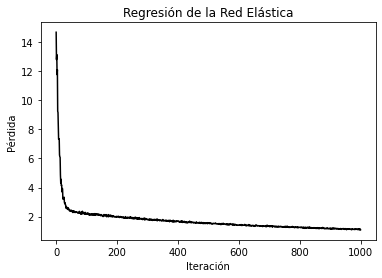

In [78]:
plt.plot(loss_vec, 'k-')
plt.title("Regresión de la Red Elástica")
plt.xlabel("Iteración")
plt.ylabel("Pérdida")
plt.show()